# Fleet modeling

This notebook aims at using the classes dedicated to the fleet modelling that are used in AeroMAPS.

## Load and process

In [1]:
from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.fleet_model import (
    AircraftParameters,
    SubcategoryParameters,
    CategoryParameters,
    Aircraft,
    SubCategory,
    Category,
    Fleet,
    FleetModel,
)

from aeromaps.models.parameters import YearParameters

year_parameters = YearParameters(
    historic_start_year=2020, prospection_start_year=2020, end_year=2050
)

from aeromaps.models.air_transport.constants import EnergyTypes

import pandas as pd

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

The fleet is divided into three main categories of aircraft, associated to an initial subcategory based on representative aircraft:
- Short range (Conventional narrow-body)
- Medium range (Conventional narrow-body)
- Long range (Conventional wide-body)

Lets now assemble these categories into a fleet object. By default, two new aircraft have been added to the initial subcategories, and two subcategories have also been added for Short Range (turboprop aircraft and hydrogen aircraft). Illustrative values are considered.

In [2]:
fleet = Fleet()

## Set up the fleet

A dedicated user interface can be used for modifying the fleet using the following command. The can then directly change the future composition of the fleet by simply adding subcategories and aircraft. For subcategories, the final distribution between the different subcategories among a category has to be indicated. For aircraft, the user can choose an Entry-Into-Service year as well as the type of fuel used (DROP_IN_FUEL or HYDROGEN). The gains in terms of fuel consumption, NOx emission index and soot emission index, in comparison to the recent reference aircraft in the initial subcategory, also have to be specified. Negative values can be considered, meaning an increase in fuel consumption for instance.

In [3]:
fleet.ui

## Compute

Once the fleet has been chosen, the user can compute.

In [4]:
fleet_model = FleetModel(fleet=fleet, year_parameters=year_parameters)
fleet_model.compute()

## Results and plots

The user can then display the results.

In [5]:
fleet_model.df

,Short Range:Hydrogen conventional narrow-body:New Short-range hydrogen:single_aircraft_share,Short Range:Regional turboprop:New Regional turboprop 1:single_aircraft_share,Short Range:Regional turboprop:New Regional turboprop 2:single_aircraft_share,Short Range:Conventional narrow-body:recent_reference:single_aircraft_share,Short Range:Conventional narrow-body:old_reference:single_aircraft_share,Short Range:Conventional narrow-body:New Narrow-body 1:single_aircraft_share,Short Range:Conventional narrow-body:New Narrow-body 2:single_aircraft_share,Medium Range:Conventional narrow-body:recent_reference:single_aircraft_share,Medium Range:Conventional narrow-body:old_reference:single_aircraft_share,Medium Range:Conventional narrow-body:New Medium-range 1:single_aircraft_share,Medium Range:Conventional narrow-body:New Medium-range 2:single_aircraft_share,Long Range:Conventional wide-body:recent_reference:single_aircraft_share,Long Range:Conventional wide-body:old_reference:single_aircraft_share,Long Range:Conventional wide-body:New Long-range 1:single_aircraft_share,Long Range:Conventional wide-body:New Long-range 2:single_aircraft_share,Short Range:Hydrogen conventional narrow-body:New Short-range hydrogen:aircraft_share,Short Range:Regional turboprop:New Regional turboprop 2:aircraft_share,Short Range:Regional turboprop:New Regional turboprop 1:aircraft_share,Short Range:Conventional narrow-body:New Narrow-body 2:aircraft_share,Short Range:Conventional narrow-body:New Narrow-body 1:aircraft_share,Short Range:Conventional narrow-body:recent_reference:aircraft_share,Short Range:Conventional narrow-body:old_reference:aircraft_share,Medium Range:Conventional narrow-body:New Medium-range 2:aircraft_share,Medium Range:Conventional narrow-body:New Medium-range 1:aircraft_share,Medium Range:Conventional narrow-body:recent_reference:aircraft_share,Medium Range:Conventional narrow-body:old_reference:aircraft_share,Long Range:Conventional wide-body:New Long-range 2:aircraft_share,Long Range:Conventional wide-body:New Long-range 1:aircraft_share,Long Range:Conventional wide-body:recent_reference:aircraft_share,Long Range:Conventional wide-body:old_reference:aircraft_share,Short Range:Conventional narrow-body:energy_consumption,Short Range:Conventional narrow-body:energy_consumption:dropin_fuel,Short Range:Conventional narrow-body:energy_consumption:hydrogen,Short Range:Conventional narrow-body:share:total,Short Range:Conventional narrow-body:share:dropin_fuel,Short Range:Conventional narrow-body:share:hydrogen,Short Range:share:dropin_fuel,Short Range:share:hydrogen,Short Range:Regional turboprop:energy_consumption,Short Range:Regional turboprop:energy_consumption:dropin_fuel,Short Range:Regional turboprop:energy_consumption:hydrogen,Short Range:Regional turboprop:share:total,Short Range:Regional turboprop:share:dropin_fuel,Short Range:Regional turboprop:share:hydrogen,Short Range:Hydrogen conventional narrow-body:energy_consumption,Short Range:Hydrogen conventional narrow-body:energy_consumption:dropin_fuel,Short Range:Hydrogen conventional narrow-body:energy_consumption:hydrogen,Short Range:Hydrogen conventional narrow-body:share:total,Short Range:Hydrogen conventional narrow-body:share:dropin_fuel,Short Range:Hydrogen conventional narrow-body:share:hydrogen,Short Range:energy_consumption:dropin_fuel,Short Range:energy_consumption:hydrogen,Short Range:energy_consumption,Medium Range:Conventional narrow-body:energy_consumption,Medium Range:Conventional narrow-body:energy_consumption:dropin_fuel,Medium Range:Conventional narrow-body:energy_consumption:hydrogen,Medium Range:Conventional narrow-body:share:total,Medium Range:Conventional narrow-body:share:dropin_fuel,Medium Range:Conventional narrow-body:share:hydrogen,Medium Range:share:dropin_fuel,Medium Range:share:hydrogen,Medium Range:energy_consumption:dropin_fuel,Medium Range:energy_consumption:hydrogen,Medium Range:energy_consumption,Long Range:Conventional wide-body:energy_consumption,

More simply, the user can plot fleet renewal and its impact on energy consumption per ASK for each category.

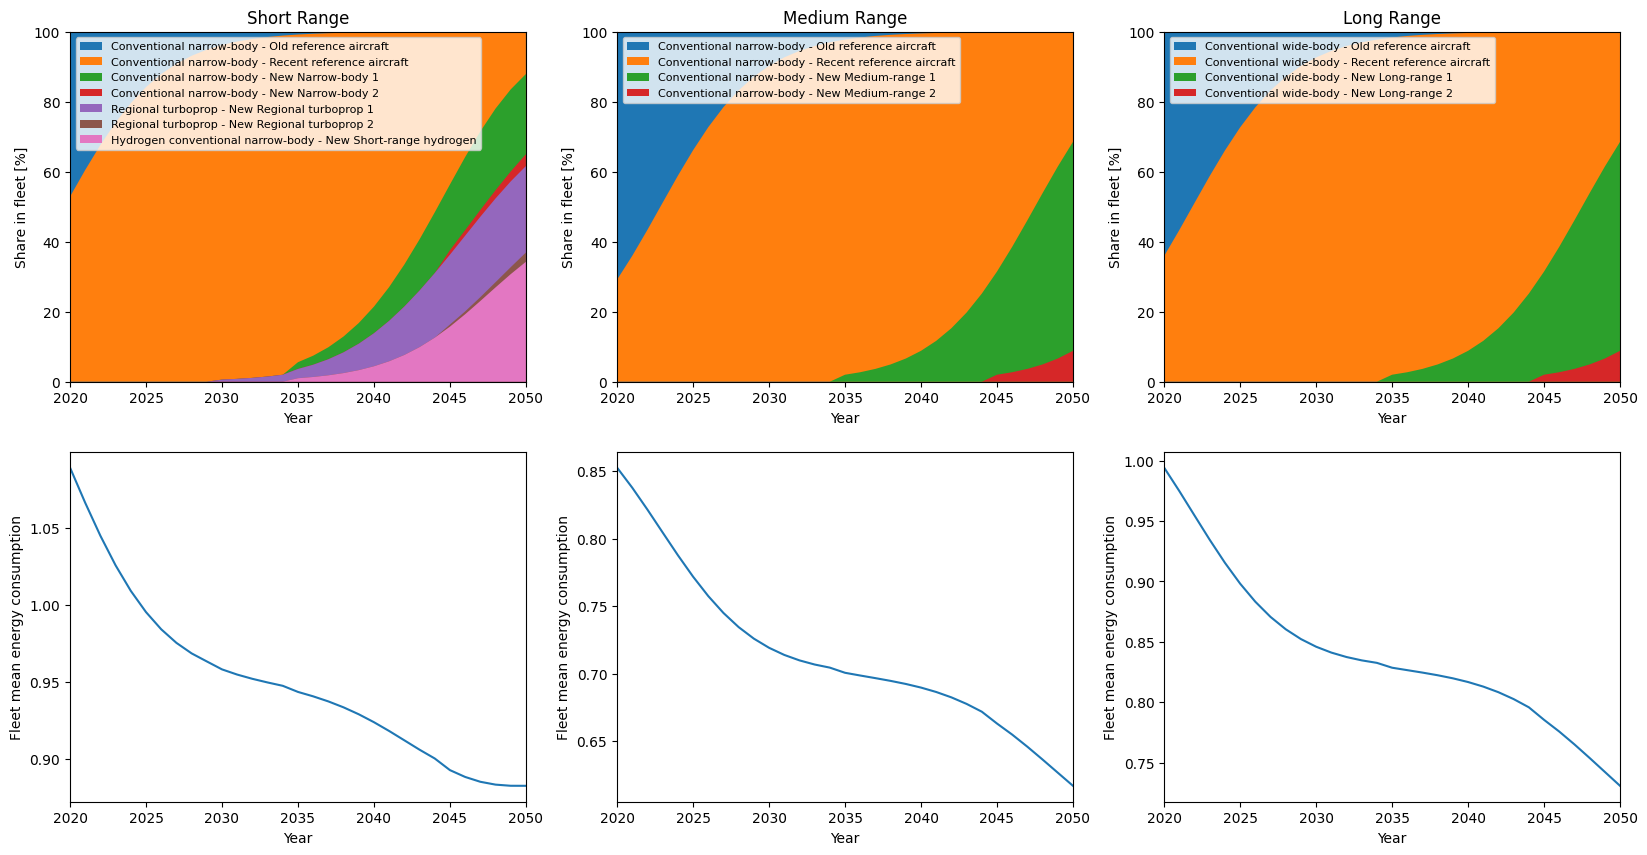

In [6]:
fleet_model.plot()

# 

## Link with other AeroMAPS models